In [ ]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets

In [ ]:
y = y.copy()
y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [ ]:
# convert to a pytorch tensor
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float()
labels = labels.view(-1, 1)
labels=labels.squeeze().long()

<font color='red'>NOTE</font>
---
No set seed in this experiment

# Separate the data into DataLoaders

In [ ]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0]) # how big should these batches be??

# Create the model and a training regimen

In [ ]:
class ANN_CLASS(nn.Module):
    def __init__(self,dropoutRate):
        super().__init__()

        ### layers
        self.input  = nn.Linear( 4,12)
        self.hidden = nn.Linear(12,12)
        self.output = nn.Linear(12, 3)

        # parameters
        self.dr = dropoutRate

        # forward pass
    def forward(self,x):

        # input
        x = F.relu( self.input(x) )
        x = F.dropout(x,p=self.dr,training=self.training) # switch dropout off during .eval()

        # hidden
        x = F.relu( self.hidden(x) )
        x = F.dropout(x,p=self.dr,training=self.training)

        # output
        x = self.output(x)
        return x

In [ ]:
# a function that creates the ANN model

def ANN_MODEL(dropoutrate):

    # grab an instance of the model class
    ANN = ANN_CLASS(dropoutrate)

    # loss function
    lossfunc = nn.CrossEntropyLoss()

    # optim
    optim = torch.optim.SGD(ANN.parameters(),lr=.005)

    return ANN,lossfunc,optim

In [ ]:
# train the model

# global parameter
epochs = 1000

def train():

    # initialize accuracies as empties (not storing losses here)
    train_accuracy = []
    test_accuracy  = []

    # loop over epochs
    for i in range(epochs):

        # switch learning on
        ANN.train()

    # loop over training data batches
    batch_accuracy = []
    for X,y in train_loader:
        # forward pass and loss
        yHat = ANN(X)
        loss = lossfunc(yHat,y)

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()

        # compute training accuracy just for this batch
        batch_accuracy.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
        # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    train_accuracy.append( np.mean(batch_accuracy) )

    # test accuracy
    ANN.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANN(X),axis=1 )
    test_accuracy.append( 100*torch.mean((predlabels == y).float()).item() )

    # function output
    return train_accuracy,test_accuracy


# Experiment Code

In [ ]:
dropoutRates = np.arange(10)/10
results = np.zeros((len(dropoutRates),2))

for di in range(len(dropoutRates)):

    # create and train the model
    ANN,lossfunc,optim = ANN_MODEL(dropoutRates[di])
    train_accuracy,test_accuracy = train()

    # store accuracies
    results[di,0] = np.mean(train_accuracy[-50:])
    results[di,1] = np.mean(test_accuracy[-50:])


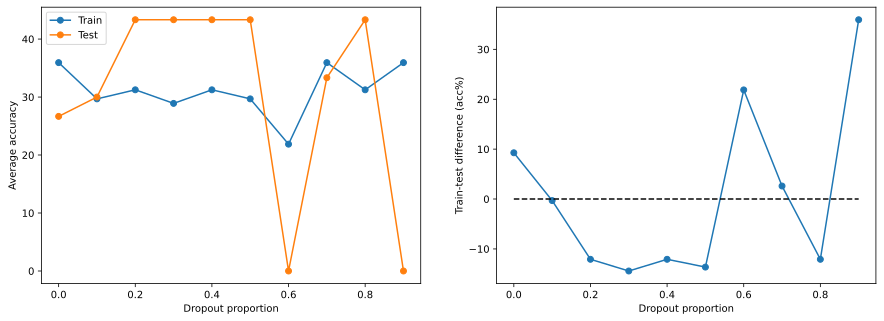

In [ ]:
# plot the experiment results
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(dropoutRates,results,'o-')
ax[0].set_xlabel('Dropout proportion')
ax[0].set_ylabel('Average accuracy')
ax[0].legend(['Train','Test'])

ax[1].plot(dropoutRates,-np.diff(results,axis=1),'o-')
ax[1].plot([0,.9],[0,0],'k--')
ax[1].set_xlabel('Dropout proportion')
ax[1].set_ylabel('Train-test difference (acc%)')

plt.show()

# Experiments

1. Change the activation function into a different activation function and re-run the code, compare the result with the ReLU activation function. Does different activation function affect the performance of the dropout?

2. Create a wide network using ReLU as the activation function and conduct the same experiment, compare the result to that of the original code.

3. Create a more complex model by adding more layers into the architecture, conduct the same experiment, compare the result to that of the original code.

#Experiment 1

/tmp/ipython-input-2036685834.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})



🔹 Training with ReLU activation

🔹 Training with Sigmoid activation

🔹 Training with Tanh activation

🔹 Training with LeakyReLU activation


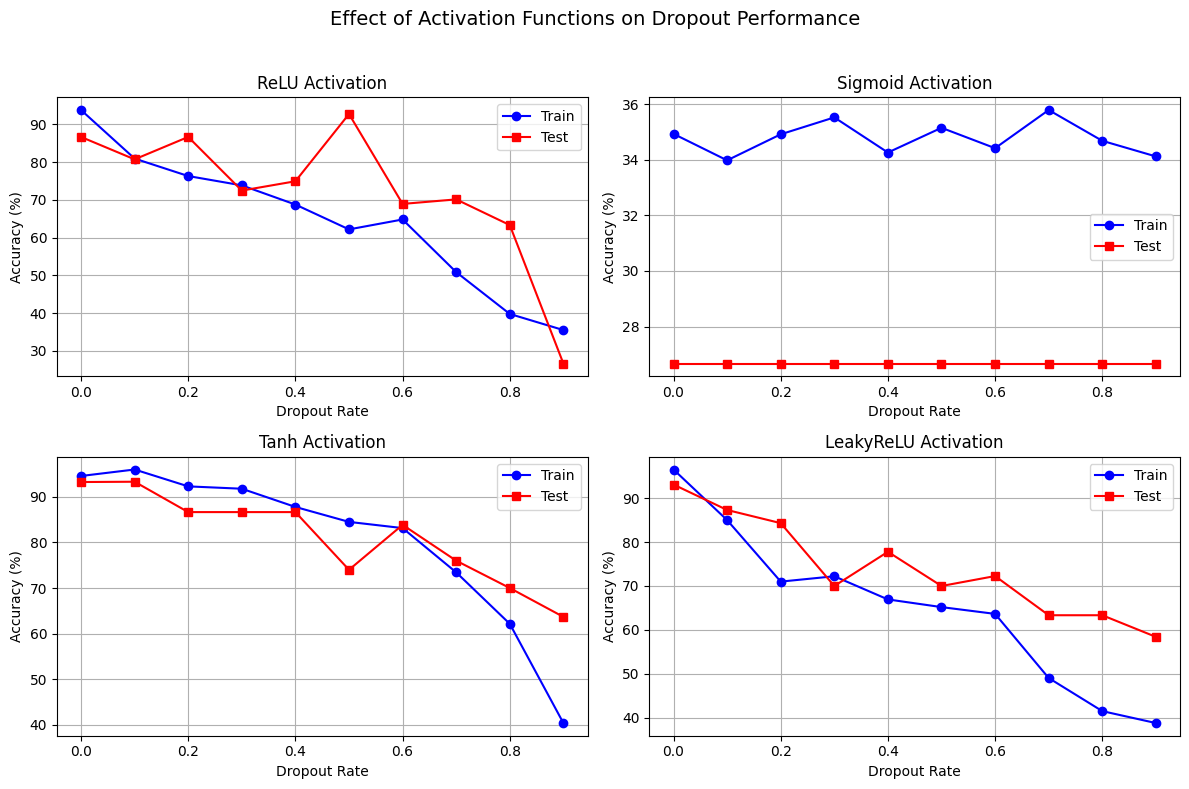

In [3]:
# =============================================================
# 🔹 Import Libraries
# =============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from ucimlrepo import fetch_ucirepo

# =============================================================
# 🔹 Load and Preprocess the Data
# =============================================================
iris = fetch_ucirepo(id=53)

# Scale features
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Encode targets
y = iris.data.targets.copy()
y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Convert to tensors
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float()
labels = labels.view(-1, 1).squeeze().long()

# Split into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

# Create DataLoaders
batchsize = 16
train_loader = DataLoader(TensorDataset(train_data, train_labels), batch_size=batchsize, shuffle=True)
test_loader  = DataLoader(TensorDataset(test_data, test_labels), batch_size=test_data.shape[0])

# =============================================================
# 🔹 Define Model Class (Flexible Activation + Dropout)
# =============================================================
class ANN_CLASS(nn.Module):
    def __init__(self, dropoutRate, activation_fn):
        super().__init__()
        self.input = nn.Linear(4, 12)
        self.hidden = nn.Linear(12, 12)
        self.output = nn.Linear(12, 3)
        self.dr = dropoutRate
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.activation_fn(self.input(x))
        x = F.dropout(x, p=self.dr, training=self.training)
        x = self.activation_fn(self.hidden(x))
        x = F.dropout(x, p=self.dr, training=self.training)
        return self.output(x)

# =============================================================
# 🔹 Model Creation Function
# =============================================================
def ANN_MODEL(dropoutrate, activation_fn):
    model = ANN_CLASS(dropoutrate, activation_fn)
    lossfunc = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=0.005)
    return model, lossfunc, optim

# =============================================================
# 🔹 Training Function
# =============================================================
def train(model, lossfunc, optim, epochs=1000):
    train_accuracy = []
    test_accuracy  = []

    for i in range(epochs):
        model.train()
        batch_acc = []
        for X, y in train_loader:
            yHat = model(X)
            loss = lossfunc(yHat, y)
            optim.zero_grad()
            loss.backward()
            optim.step()
            batch_acc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())
        train_accuracy.append(np.mean(batch_acc))

        # Evaluate
        model.eval()
        X, y = next(iter(test_loader))
        pred = model(X)
        acc = 100 * torch.mean((torch.argmax(pred, axis=1) == y).float()).item()
        test_accuracy.append(acc)

    return train_accuracy, test_accuracy

# =============================================================
# 🔹 Experiment Setup
# =============================================================
dropoutRates = np.arange(0, 1.0, 0.1)
activations = {
    "ReLU": F.relu,
    "Sigmoid": torch.sigmoid,
    "Tanh": torch.tanh,
    "LeakyReLU": F.leaky_relu
}

results = {}

for name, act_fn in activations.items():
    acc_results = np.zeros((len(dropoutRates), 2))
    print(f"\n🔹 Training with {name} activation")
    for i, dr in enumerate(dropoutRates):
        model, lossfunc, optim = ANN_MODEL(dr, act_fn)
        train_acc, test_acc = train(model, lossfunc, optim, epochs=500)
        acc_results[i, 0] = np.mean(train_acc[-50:])
        acc_results[i, 1] = np.mean(test_acc[-50:])
    results[name] = acc_results

# =============================================================
# 🔹 Plot the Results
# =============================================================
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, (name, acc_data) in zip(axes, results.items()):
    ax.plot(dropoutRates, acc_data[:, 0], 'b-o', label='Train')
    ax.plot(dropoutRates, acc_data[:, 1], 'r-s', label='Test')
    ax.set_title(f'{name} Activation')
    ax.set_xlabel('Dropout Rate')
    ax.set_ylabel('Accuracy (%)')
    ax.legend()
    ax.grid(True)

plt.suptitle('Effect of Activation Functions on Dropout Performance', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#Experiment 2

/tmp/ipython-input-2213725949.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


Training with dropout=0.0
Training with dropout=0.1
Training with dropout=0.2
Training with dropout=0.30000000000000004
Training with dropout=0.4
Training with dropout=0.5
Training with dropout=0.6000000000000001
Training with dropout=0.7000000000000001
Training with dropout=0.8
Training with dropout=0.9


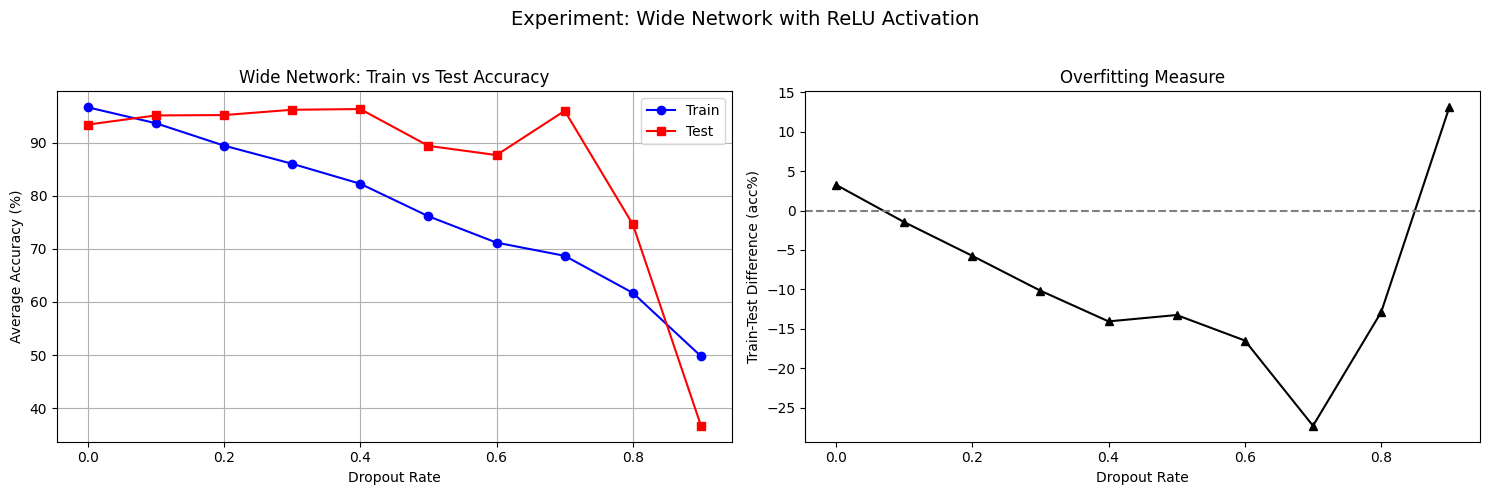

In [4]:
# =============================================================
# 🔹 Import Libraries
# =============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from ucimlrepo import fetch_ucirepo

# =============================================================
# 🔹 Load and Preprocess the Data
# =============================================================
iris = fetch_ucirepo(id=53)

# Scale features
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Encode target classes numerically
y = iris.data.targets.copy()
y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

# Convert to PyTorch tensors
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float()
labels = labels.view(-1, 1).squeeze().long()

# =============================================================
# 🔹 Split into DataLoaders
# =============================================================
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

train_data = TensorDataset(train_data, train_labels)
test_data  = TensorDataset(test_data, test_labels)

batchsize = 16
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

# =============================================================
# 🔹 Define the Wide Network Model
# =============================================================
class WideANN(nn.Module):
    def __init__(self, dropoutRate):
        super().__init__()
        # Wider layers (more neurons)
        self.input = nn.Linear(4, 64)
        self.hidden1 = nn.Linear(64, 64)
        self.hidden2 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 3)
        self.dr = dropoutRate

    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.dropout(x, p=self.dr, training=self.training)
        x = F.relu(self.hidden1(x))
        x = F.dropout(x, p=self.dr, training=self.training)
        x = F.relu(self.hidden2(x))
        x = F.dropout(x, p=self.dr, training=self.training)
        x = self.output(x)
        return x

# =============================================================
# 🔹 Helper: Create Model, Loss, Optimizer
# =============================================================
def create_model(dropoutrate):
    model = WideANN(dropoutrate)
    lossfunc = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=0.005)
    return model, lossfunc, optim

# =============================================================
# 🔹 Training Function
# =============================================================
def train_model(model, lossfunc, optim, epochs=1000):
    train_accuracy, test_accuracy = [], []

    for epoch in range(epochs):
        model.train()
        batch_acc = []

        for X, y in train_loader:
            yHat = model(X)
            loss = lossfunc(yHat, y)
            optim.zero_grad()
            loss.backward()
            optim.step()
            batch_acc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())

        train_accuracy.append(np.mean(batch_acc))

        # Evaluate on test set
        model.eval()
        X, y = next(iter(test_loader))
        yHat = model(X)
        acc = 100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item()
        test_accuracy.append(acc)

    return train_accuracy, test_accuracy

# =============================================================
# 🔹 Run the Dropout Experiment
# =============================================================
dropoutRates = np.arange(0, 1.0, 0.1)
results = np.zeros((len(dropoutRates), 2))

for i, dr in enumerate(dropoutRates):
    print(f"Training with dropout={dr}")
    model, lossfunc, optim = create_model(dr)
    train_acc, test_acc = train_model(model, lossfunc, optim, epochs=500)
    results[i, 0] = np.mean(train_acc[-50:])
    results[i, 1] = np.mean(test_acc[-50:])

# =============================================================
# 🔹 Plot the Results
# =============================================================
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(dropoutRates, results[:, 0], 'bo-', label='Train')
ax[0].plot(dropoutRates, results[:, 1], 'rs-', label='Test')
ax[0].set_xlabel('Dropout Rate')
ax[0].set_ylabel('Average Accuracy (%)')
ax[0].set_title('Wide Network: Train vs Test Accuracy')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(dropoutRates, -np.diff(results, axis=1), 'k^-')
ax[1].axhline(0, color='gray', linestyle='--')
ax[1].set_xlabel('Dropout Rate')
ax[1].set_ylabel('Train-Test Difference (acc%)')
ax[1].set_title('Overfitting Measure')

plt.suptitle('Experiment: Wide Network with ReLU Activation', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#Experiment 3

/tmp/ipython-input-2922681494.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


Training with dropout=0.0
Training with dropout=0.1
Training with dropout=0.2
Training with dropout=0.30000000000000004
Training with dropout=0.4
Training with dropout=0.5
Training with dropout=0.6000000000000001
Training with dropout=0.7000000000000001
Training with dropout=0.8
Training with dropout=0.9


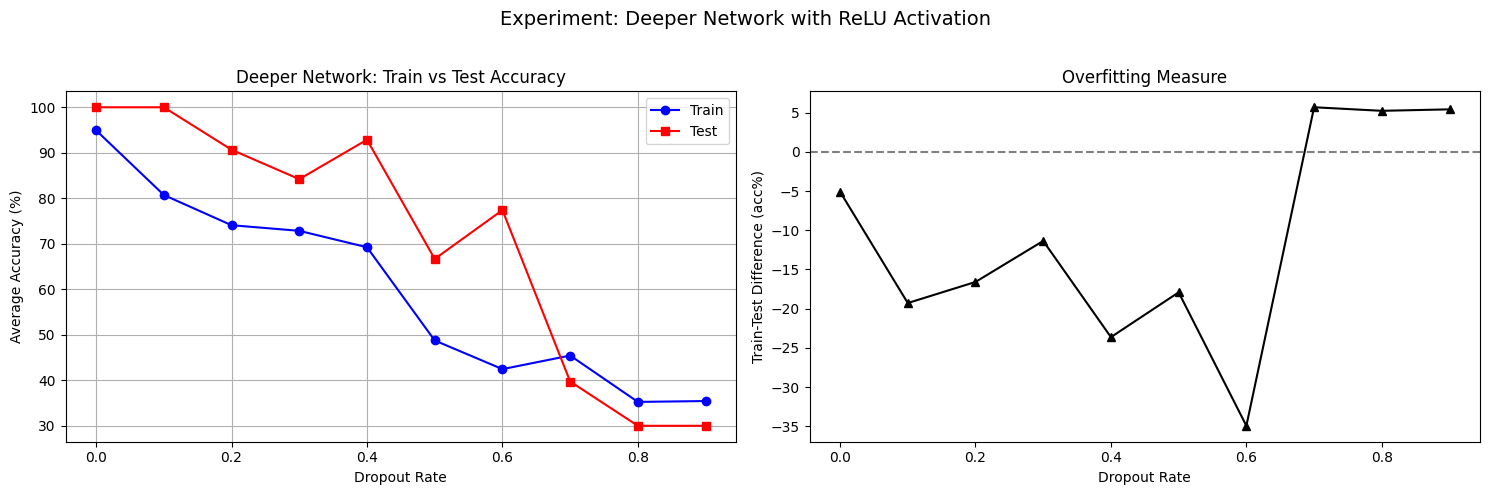

In [5]:
# =============================================================
# 🔹 Import Libraries
# =============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from ucimlrepo import fetch_ucirepo

# =============================================================
# 🔹 Load and Preprocess the Data
# =============================================================
iris = fetch_ucirepo(id=53)

# Scale features
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Encode target classes
y = iris.data.targets.copy()
y["class"] = y["class"].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Convert to tensors
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float()
labels = labels.view(-1, 1).squeeze().long()

# =============================================================
# 🔹 Split into DataLoaders
# =============================================================
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

batchsize = 16
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

# =============================================================
# 🔹 Define a Deeper ANN Model
# =============================================================
class DeepANN(nn.Module):
    def __init__(self, dropoutRate):
        super().__init__()
        # deeper architecture: 4 hidden layers
        self.input = nn.Linear(4, 32)
        self.hidden1 = nn.Linear(32, 32)
        self.hidden2 = nn.Linear(32, 32)
        self.hidden3 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 3)
        self.dr = dropoutRate

    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.dropout(x, p=self.dr, training=self.training)
        x = F.relu(self.hidden1(x))
        x = F.dropout(x, p=self.dr, training=self.training)
        x = F.relu(self.hidden2(x))
        x = F.dropout(x, p=self.dr, training=self.training)
        x = F.relu(self.hidden3(x))
        x = F.dropout(x, p=self.dr, training=self.training)
        x = self.output(x)
        return x

# =============================================================
# 🔹 Helper: Create Model, Loss, Optimizer
# =============================================================
def create_model(dropoutrate):
    model = DeepANN(dropoutrate)
    lossfunc = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=0.005)
    return model, lossfunc, optim

# =============================================================
# 🔹 Training Function
# =============================================================
def train_model(model, lossfunc, optim, epochs=1000):
    train_accuracy, test_accuracy = [], []

    for epoch in range(epochs):
        model.train()
        batch_acc = []

        for X, y in train_loader:
            yHat = model(X)
            loss = lossfunc(yHat, y)
            optim.zero_grad()
            loss.backward()
            optim.step()
            batch_acc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())

        train_accuracy.append(np.mean(batch_acc))

        # Evaluate
        model.eval()
        X, y = next(iter(test_loader))
        yHat = model(X)
        acc = 100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item()
        test_accuracy.append(acc)

    return train_accuracy, test_accuracy

# =============================================================
# 🔹 Run the Dropout Experiment
# =============================================================
dropoutRates = np.arange(0, 1.0, 0.1)
results = np.zeros((len(dropoutRates), 2))

for i, dr in enumerate(dropoutRates):
    print(f"Training with dropout={dr}")
    model, lossfunc, optim = create_model(dr)
    train_acc, test_acc = train_model(model, lossfunc, optim, epochs=500)
    results[i, 0] = np.mean(train_acc[-50:])
    results[i, 1] = np.mean(test_acc[-50:])

# =============================================================
# 🔹 Plot Results
# =============================================================
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy Plot
ax[0].plot(dropoutRates, results[:, 0], 'bo-', label='Train')
ax[0].plot(dropoutRates, results[:, 1], 'rs-', label='Test')
ax[0].set_xlabel('Dropout Rate')
ax[0].set_ylabel('Average Accuracy (%)')
ax[0].set_title('Deeper Network: Train vs Test Accuracy')
ax[0].legend()
ax[0].grid(True)

# Overfitting Measure
ax[1].plot(dropoutRates, -np.diff(results, axis=1), 'k^-')
ax[1].axhline(0, color='gray', linestyle='--')
ax[1].set_xlabel('Dropout Rate')
ax[1].set_ylabel('Train-Test Difference (acc%)')
ax[1].set_title('Overfitting Measure')

plt.suptitle('Experiment: Deeper Network with ReLU Activation', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
